In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/High priority tickets.xlsx")
df.head()

,Date,Tickets
0,2020-03-01,1
1,2020-03-02,1
2,2020-03-03,2
3,2020-03-04,1
4,2020-03-05,1


In [ ]:
df['D']=df['Date'].apply(lambda time: time.dayofweek)

In [ ]:
df_r=df

In [ ]:
df_r

,Date,Tickets,D
0,2020-03-01,1,6
1,2020-03-02,1,0
2,2020-03-03,2,1
3,2020-03-04,1,2
4,2020-03-05,1,3
...,...,...,...
791,2022-05-01,2,6
792,2022-05-02,34,0
793,2022-05-03,27,1
794,2022-05-04,56,2


In [ ]:
df=df[(df['D']<5)]

In [ ]:
df.head(20)

,Date,Tickets,D
1,2020-03-02,1,0
2,2020-03-03,2,1
3,2020-03-04,1,2
4,2020-03-05,1,3
5,2020-03-06,2,4
8,2020-03-09,4,0
9,2020-03-10,1,1
10,2020-03-11,1,2
11,2020-03-12,1,3
12,2020-03-13,1,4


In [ ]:
df.shape

(569, 3)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df["Tickets"])
print("ADF-",result[0])
print("P-",result[1])

ADF- -3.9854791679208215
P- 0.0014884846074437515


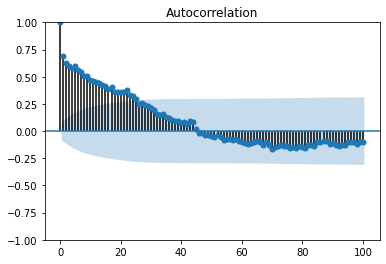

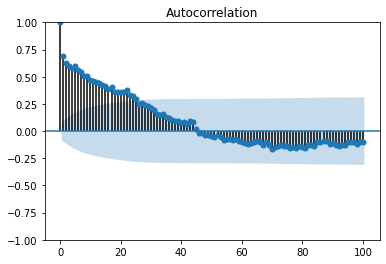

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Tickets"],lags=100)

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
z=df["Tickets"]
ndiffs(z,test='kpss')

1

In [ ]:
ndiffs(z,test='pp')

0

In [ ]:
ndiffs(z,test='adf')

0

In [ ]:
from pmdarima import auto_arima

In [ ]:
from inspect import trace
model=auto_arima(df["Tickets"],start_p=1,start_q=1,test="kpss",
                 max_p=10,max_q=10,
                 m=1,
                 d=None,
                 seasonal=True,
                 start_P=0,
                 D=0,
                 trace=True,
                 error_action='ignore',
                 suppress_warnings=True,
                 stepwise=True
                )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4636.901, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4834.776, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4737.222, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4641.561, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4832.784, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4638.771, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4630.506, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4636.778, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4630.222, Time=0.81 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4631.840, Time=0.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4632.059, Time=1.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4630.445, Time=1.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4640.742, Time=1.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.08 sec
 ARIMA(2,1,2)(0,0,0)[0]             : 

In [ ]:
df.shape

(569, 3)

In [ ]:
trained=df.iloc[:500]
testes=df.iloc[500:]
trained.head()

,Date,Tickets,D
1,2020-03-02,1,0
2,2020-03-03,2,1
3,2020-03-04,1,2
4,2020-03-05,1,3
5,2020-03-06,2,4


In [ ]:
model=auto_arima(trained["Tickets"],start_p=1,start_q=1,test="kpss",
                 max_p=10,max_q=5,
                 m=7,
                 d=None,
                 seasonal=False,
                 start_P=0,
                 D=0,
                 trace=True,
                 error_action='ignore',
                 suppress_warnings=True,
                 stepwise=True
                )

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4035.473, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4202.931, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4116.012, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4037.266, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4200.965, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4037.201, Time=0.65 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4029.951, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4035.228, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4031.113, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4031.169, Time=1.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4036.985, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.49 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4028.248, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4033.573, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0]             : 

In [ ]:
model.fit(trained["Tickets"])

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
len(testes)

69

In [ ]:
forecast,confidence_interval=model.predict(n_periods=69,return_conf_int=True,alpha=0.05)

In [ ]:
confidence_interval.shape

(69, 2)

In [ ]:
testes["forecast"]=forecast
testes["lower"]=confidence_interval[:,0]
testes["higher"]=confidence_interval[:,1]
testes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Date,Tickets,D,forecast,lower,higher
701,2022-01-31,85,0,49.112975,22.499202,75.726748
702,2022-02-01,36,1,51.122113,22.836836,79.407389
703,2022-02-02,33,2,49.362848,20.353975,78.371722
704,2022-02-03,53,3,50.903315,20.473921,81.332710
705,2022-02-04,30,4,49.554434,18.378687,80.730181
...,...,...,...,...,...,...
789,2022-04-29,50,4,50.183936,-18.617683,118.985555
792,2022-05-02,34,0,50.184345,-19.069942,119.438632
793,2022-05-03,27,1,50.183987,-19.519956,119.887930
794,2022-05-04,56,2,50.184301,-19.966480,120.335081


In [ ]:
from pmdarima.metrics import smape

In [ ]:
mpe=smape(testes["Tickets"],testes["forecast"])
print(mpe)

27.68646384899188
